In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import env
import wrangle

## Acquire Data

In [2]:
df = wrangle.wrangle_telco()
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


## Quick Prep Data to Explore

In [3]:
df.set_index('customer_id', inplace=True)

In [4]:
df.head(1)

,monthly_charges,tenure,total_charges
customer_id,,,
0013-SMEOE,109.7,71,7904.25


### Create Years from Tenure

Write a function, months_to_years(tenure_months, df) that returns your dataframe with a new feature tenure_years, in complete years as a customer.

In [5]:
def months_to_years(df):
    """
    Takes in a df and returns the df with new feature "tenure_years"
    """
    df["tenure_years"] = round(df.tenure // 12)
    return df

In [6]:
df = months_to_years(df)
df.head()

,monthly_charges,tenure,total_charges,tenure_years
customer_id,,,,
0013-SMEOE,109.70,71,7904.25,5
0014-BMAQU,84.65,63,5377.80,5
0016-QLJIS,90.45,65,5957.90,5
0017-DINOC,45.20,54,2460.55,4
0017-IUDMW,116.80,72,8456.75,6


In [7]:
df.tenure_years.value_counts()

5    676
6    343
4    265
3    166
2    103
1     83
0     59
Name: tenure_years, dtype: int64

In [8]:
# Validate our data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1695 entries, 0013-SMEOE to 9995-HOTOH
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  1695 non-null   float64
 1   tenure           1695 non-null   int64  
 2   total_charges    1695 non-null   float64
 3   tenure_years     1695 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 66.2+ KB


### Split Data to Explore

In [9]:
# Create test dataset

train_validate, test = train_test_split(df, 
                                        test_size=.2, 
                                        random_state=123)
# Create train and validate datsets

train, validate = train_test_split(train_validate, 
                                   test_size=.3, 
                                   random_state=123)

# Take a look at your split datasets

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (949, 4)
validate -> (407, 4)
test -> (339, 4)


## PairGrid Plot

Write a function, plot_variable_pairs(dataframe) that plots all of the pairwise relationships along with the regression line for each pair.

In [10]:
def plot_variable_pairs(train):
    """
    Takes in a df and displays a PairGrid plot of all relationships,
    histogram and scatter plots.
    """
    g = sns.PairGrid(train)
    g.map_diag(plt.hist)
    g.map_offdiag(sns.regplot)
    
    plt.show()

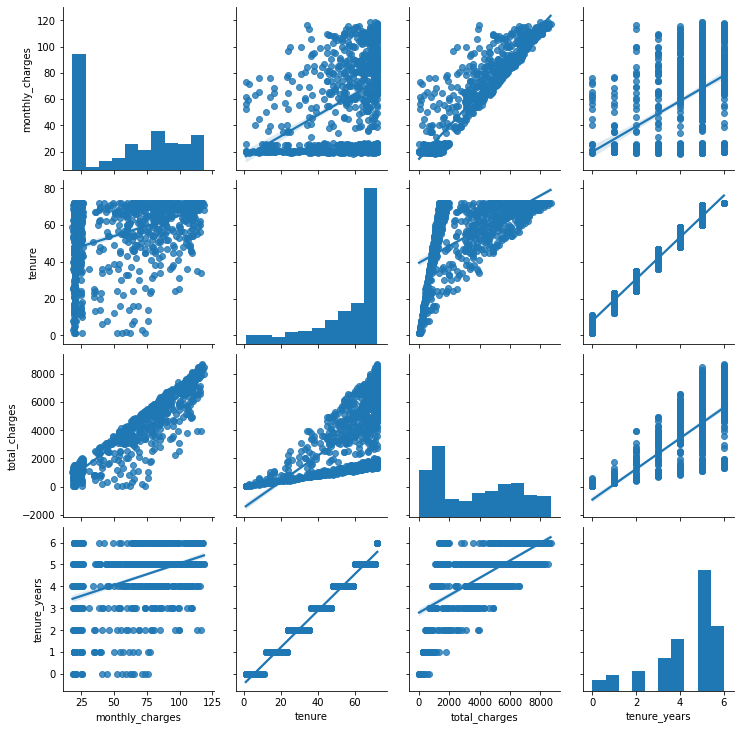

In [11]:
plot_variable_pairs(train)

In [12]:
def plot_variable_pairs_regline(train, hue=None):
    '''
    This function takes in a df and default hue=None and displays a pairplot
    with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.7}}
    sns.pairplot(train, hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

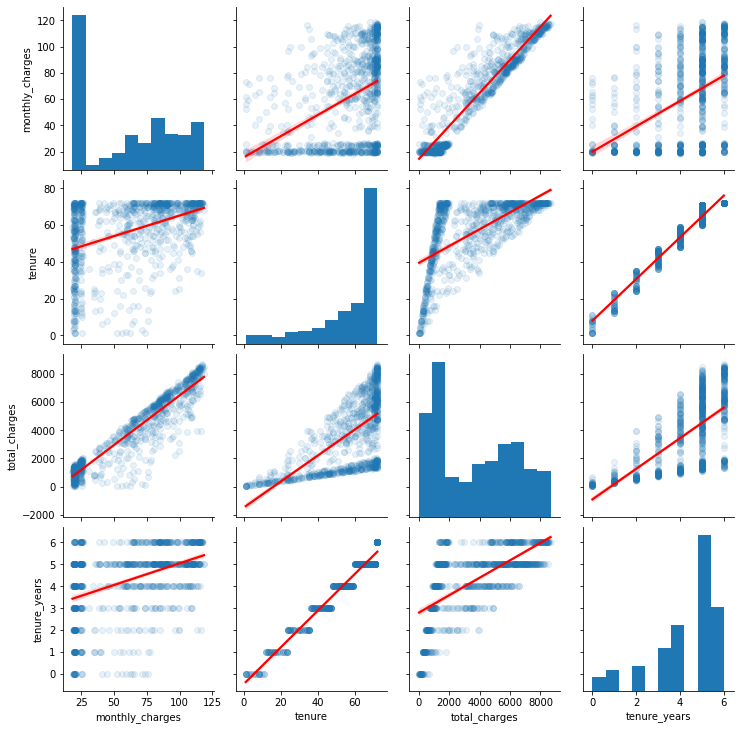

In [13]:
plot_variable_pairs_regline(train)

In [14]:
sns.__version__

'0.10.0'

In [15]:
pd.__version__

'1.0.3'

### Convert tenure_years to a Categorical Variable

In [16]:
train['tenure_years'] = train.tenure_years.astype('object')
validate['tenure_years'] = validate.tenure_years.astype('object')
test['tenure_years'] = test.tenure_years.astype('object')

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 7501-IWUNG to 9418-RUKPH
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  949 non-null    float64
 1   tenure           949 non-null    int64  
 2   total_charges    949 non-null    float64
 3   tenure_years     949 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 77.1+ KB


## Plot Categorical and Continous Variables

Write a function that takes in a string name of a categorical variable, a string name from a continuous variable and the df they live in, (categorical_var, continuous_var, df), and outputs 3 different plots for plotting a categorical variable with a continuous variable.

- For Example: tenure_years with total_charges. 


- For ideas on effective ways to visualize categorical with continuous: https://datavizcatalogue.com/. You can then look into seaborn and matplotlib documentation for ways to create plots.

In [18]:
def plot_categorical_and_continuous_vars(categorical_var, continuous_var, df):
    """
    This function that takes in a string name of a categorical variable, 
    a string name from a continuous variable and the df they live in and
    displays 4 different plots.
    """
    plt.suptitle(f'{continuous_var} by {categorical_var}', fontsize=18)
    
    sns.lineplot(x=categorical_var, y=continuous_var, data=df)
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)
    
    sns.catplot(x=categorical_var, y=continuous_var, data=df, kind='box', palette='Greens')
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)
    
    sns.catplot(x=categorical_var, y=continuous_var, data=df, kind="swarm", palette='Blues')
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)
    
    sns.catplot(x=categorical_var, y=continuous_var, data=df, kind="bar", palette='Purples')
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)

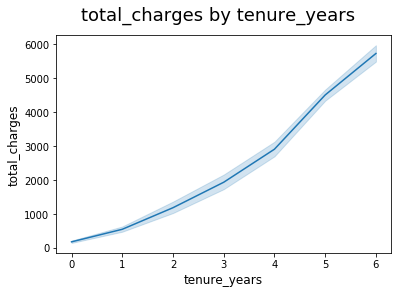

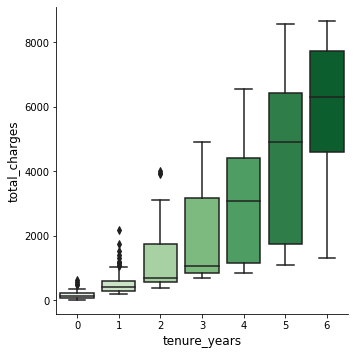

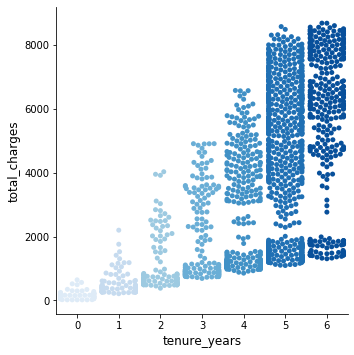

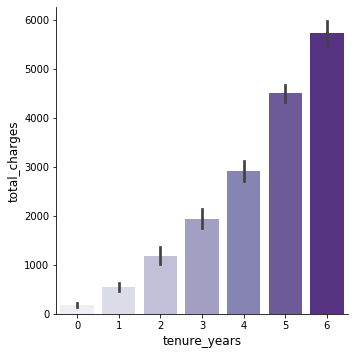

In [19]:
plot_categorical_and_continuous_vars('tenure_years', 'total_charges', df)

## Object Oriented Approach, subplots method

- figure is the container holding our plots

- axes are the actual plots

- so our plot can contain more than one axis

In [20]:
def plot_categorical_and_continuous_vars_telco(df):  
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,10), nrows=3,ncols=1, sharex=True)
    plt.style.use('seaborn-bright')

    plt.suptitle('Total Charges by Tenure Years', fontsize=18)

    ax1.plot(df.tenure_years, df.total_charges, color='mediumblue')
    ax1.set_ylabel('US Dollars', fontsize=14)

    ax2.bar(df.tenure_years, df.total_charges, color='dodgerblue')
    ax2.set_ylabel('US Dollars', fontsize=14)

    ax3.scatter(df.tenure_years, df.total_charges, color='skyblue')
    ax3.set_xlabel('Tenure in Years', fontsize=14)
    ax3.set_ylabel('US Dollars', fontsize=14)

    plt.tight_layout()
    plt.show()

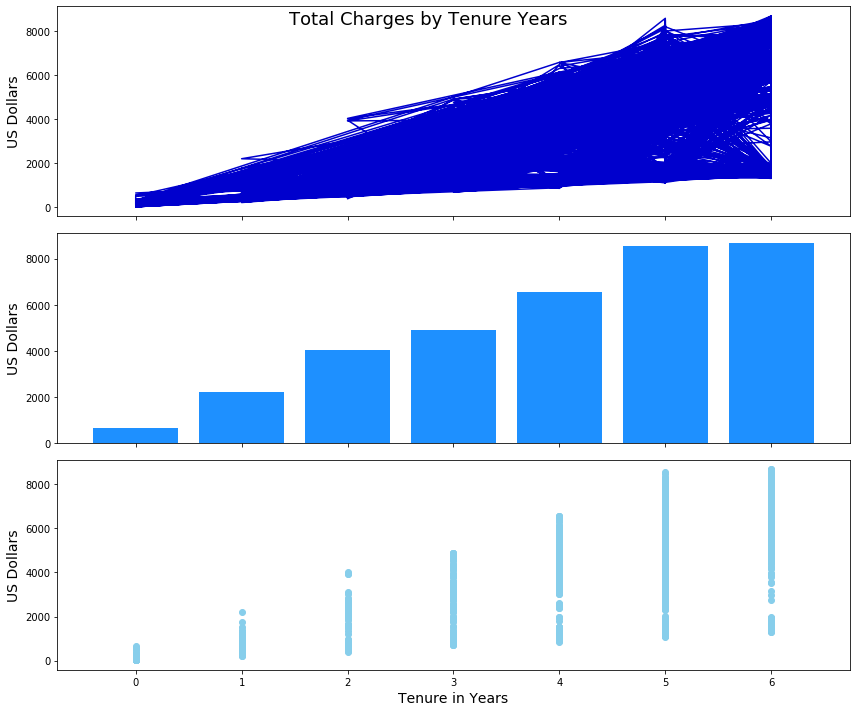

In [21]:
plot_categorical_and_continuous_vars_telco(df)

## How about some pie?

In [22]:
def telco_pie(train):
    plt.style.use('seaborn-paper')
    labels = ['0 years', '1 years', '2 years', '3 years', '4 years', '5 years', '6 years']
    colors = ['dodgerblue', 'whitesmoke', 'whitesmoke', 'whitesmoke', 'whitesmoke', 'whitesmoke', 'whitesmoke']
    explode = (0.1, 0, 0, 0, 0, 0, 0) 
    
    plt.pie(train.tenure_years.value_counts(), explode=explode, colors=colors, labels = labels, autopct='%1.0f%%', shadow=True, textprops={'fontsize':14}, wedgeprops={'edgecolor': 'black', 'width': 0.6})
    plt.title('Percent of Accounts by Tenure Years', fontsize=18)
    plt.show()

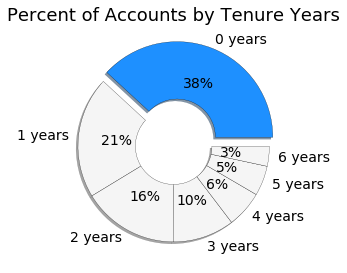

In [23]:
telco_pie(train)

## Correlation Function

In [24]:
def correlation_exploration(train, x_string, y_string):
    '''
    This function takes in a df, a string for an x-axis variable in the df, 
    and a string for a y-axis variable in the df and displays a scatter plot, the r-
    squared value, and the p-value. It explores the correlation between input the x 
    and y variables.
    '''
    r, p = stats.pearsonr(train[x_string], train[y_string])
    df.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s Relationship with {y_string}")
    print(f'The p-value is: {p}. There is {round(p,3)}% chance that we see these results by chance.')
    print(f'r = {round(r, 2)}')
    plt.show()

The p-value is: 3.846308286137554e-115. There is 0.0% chance that we see these results by chance.
r = 0.65


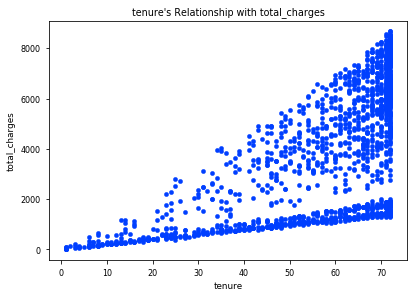

In [25]:
correlation_exploration(train, 'tenure', 'total_charges')

In [26]:
train.head(1)

,monthly_charges,tenure,total_charges,tenure_years
customer_id,,,,
7501-IWUNG,73.8,61,4616.05,5


In [44]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE

In [45]:
# Create the Model Object (Linear Regression in this case)**


lm = LinearRegression()


In [46]:
# Create the RFE Object**


k = 1

rfe = RFE(lm, k)


In [47]:
# Fit the RFE Object**
X_train = train[['tenure', 'monthly_charges']]
y_train = train[['total_charges']]

rfe.fit(X_train, y_train)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=1, step=1, verbose=0)

In [53]:
# Use the RFE Object to Get a List of Your Best Features**


rfe_best = X_train.columns[rfe.support_].tolist()
rfe_best

['monthly_charges']

In [54]:
# Save the RFE Rankings of Your Features to a Variable `rfe_var_rank`**


rfe_var_rank = rfe.ranking_

In [55]:
rfe.ranking_

array([2, 1])

In [56]:
# Save the Names of Your Features to a Variable `rfe_var_names`**

rfe_var_names = X_train.columns.tolist()
rfe_var_names

['tenure', 'monthly_charges']

In [61]:
# Create and Sort a DataFrame Using Above Variables to Check out the Ranking of the Variables**

rfe_rank_df = pd.DataFrame({'variable': rfe_var_names, 
                            'ranking': rfe_var_rank}).sort_values('ranking')
rfe_rank_df

,variable,ranking
1,monthly_charges,1
0,tenure,2


In [59]:
# Use the RFE Object to Transform/Reduce your X_train to the Selected Features if You Like**

X_rfe = pd.DataFrame(rfe.transform(X_train), columns=[rfe_best])

In [60]:
X_rfe

,monthly_charges
0,73.80
1,69.05
2,24.90
3,19.55
4,24.45
...,...
944,104.90
945,43.95
946,25.10
947,108.65
